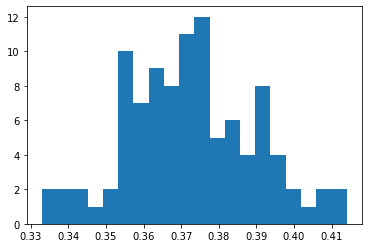

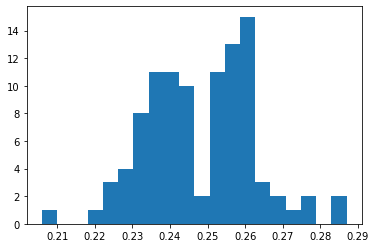

0.40404040404040403


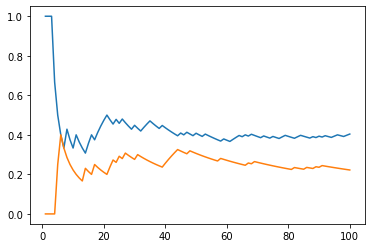

In [1]:
#monty hall 5 door, 1 door opened variant
import numpy as np
import matplotlib.pyplot as plt
def runOneSample(doors):
    switch_reward =0
    no_switch_reward = 0
    
    # prize door is fixed
    # independently 
    currsample = np.random.choice(doors,p=[1/4]*4) #door behind which there is prize
    playerchsample = np.random.choice(doors,p=[1/4]*4) #choice made by the player
    
    #compute the winning if candidate switches or otherwise
    if(currsample == playerchsample):        
        no_switch_reward = 1 #you will win if you use no switch strategy
    else:
        residue = doors[doors!=currsample]  # game show host cannot show the prize 
        residue = residue[residue!=playerchsample]  #game show host cannot show the players choice      
        doorShown = np.random.choice(residue, replace=False) #this is door chosen by game show host
        #player cannot choose the original door if he is switching       
        residue = doors[doors!=playerchsample] # we are starting afresh!!
        #he cannot choose the door which was shown to him
        residue = residue[residue!=doorShown]        
        playerch2 = np.random.choice(residue, replace=False)
        #print(currsample, playerchsample, doorShown, playerch2)        
        if playerch2 == currsample:
            switch_reward += 1 # he will win when he chooses the prize
        
        
    return switch_reward, no_switch_reward

def runMultipleMethod1(doors, reps=1000):
    csr =0
    cnsr = 0
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        #UPDATE csr and cnsr
        csr += tsr
        cnsr += tnsr
    return csr/reps,cnsr/reps

def runSimulationMethod1(doors):
    outerReps = 100
    sr = np.zeros(outerReps)
    nsr = np.zeros(outerReps)
    for oRidx in range(outerReps):
        tsr,tnsr = runMultipleMethod1(doors)
        #UPDATE sr and nsr
        sr[oRidx] = tsr
        nsr[oRidx] = tnsr
    plt.hist(sr,20)
    plt.show()
    plt.hist(nsr,20)
    plt.show()

def runSimulationMethod2(doors,reps = 100):    
    sr = np.zeros(reps)
    nsr = np.zeros(reps)
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        if idx ==0:
            sr[idx] = tsr
            nsr[idx]= tnsr
        else:
            #Update current estimate
            sr[idx] = (sr[idx-1]*(idx-1) + tsr)/idx
            nsr[idx] = (nsr[idx-1]*(idx-1) + tnsr)/idx
    plt.plot(np.array(range(1,reps+1)), sr) 
    plt.plot(np.array(range(1,reps+1)), nsr) 
    print(sr[-1])

doors = np.array([1,2,3,4])  
runSimulationMethod1(doors)  
runSimulationMethod2(doors)